# Dealing with Missing data: 
- A complete guide on **NON-TIME series** data by **[Aden](https://twitter.com/Aden_Rajput_)** with **[E-Academy](https://www.youtube.com/@E-Academy)**
- Follow to get notified on tips and tricks in the filed of Data Science.
  - [Github](https://github.com/AdenRajput)
  - [Instagram](https://www.instagram.com/e.academy12/?fbclid=IwAR1zD_9RD3864LYy1qkDNtlVjtveRupqmA77hll7kKx8OtXPErL84_CPqEE)
  - [Facebook](https://www.facebook.com/profile.php?id=100065153095057)
  

## Reasons for Missing values:
1. By default there is no data.
2. Data not collected.
3. Data deleted while storing.

In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Target: Predict the survival of each passenger based on the variables given.
- Target variable: Dependent variable = survived

In [2]:
#total missing values in each column
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [4]:
#percentage of missing values
df.isnull().sum().sort_values(ascending=False)/len(df) * 100

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64

## - Visualizing the missing data:

<AxesSubplot:>

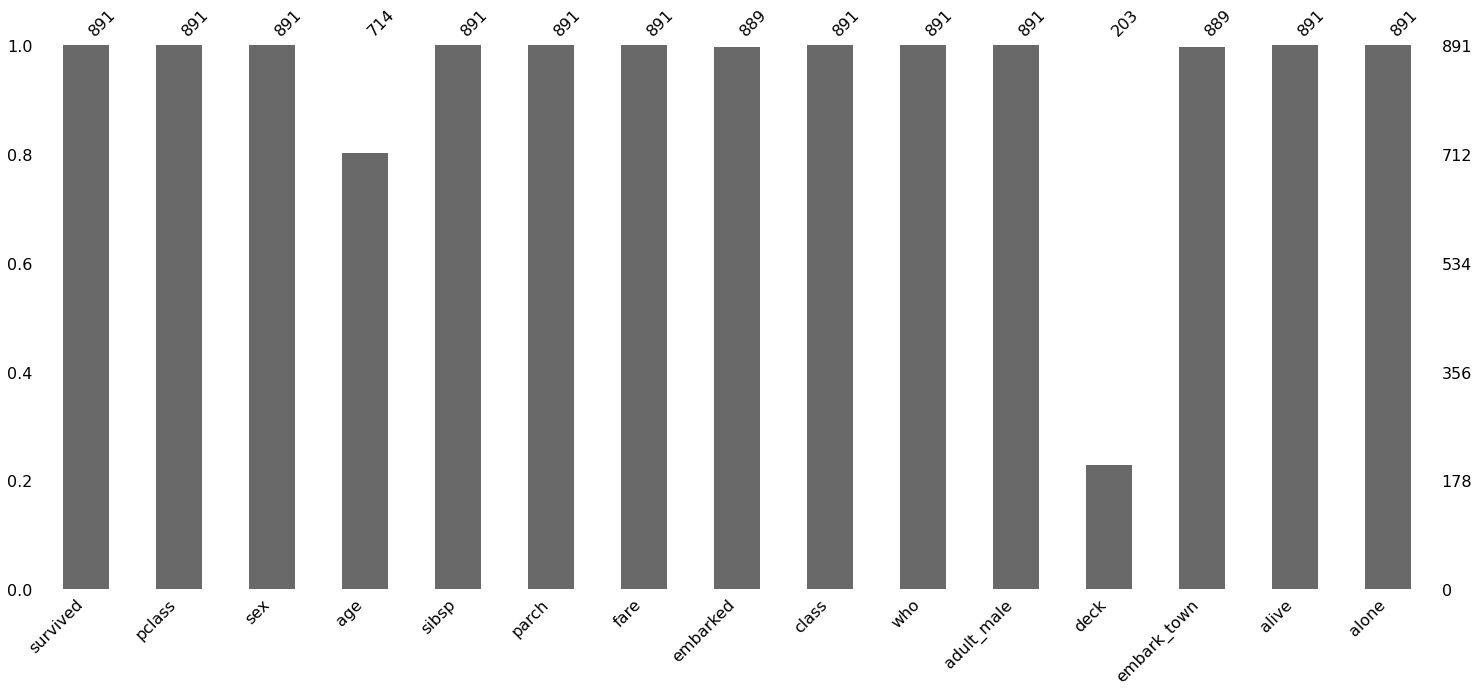

In [5]:
import missingno as msno
msno.bar(df)

<AxesSubplot:>

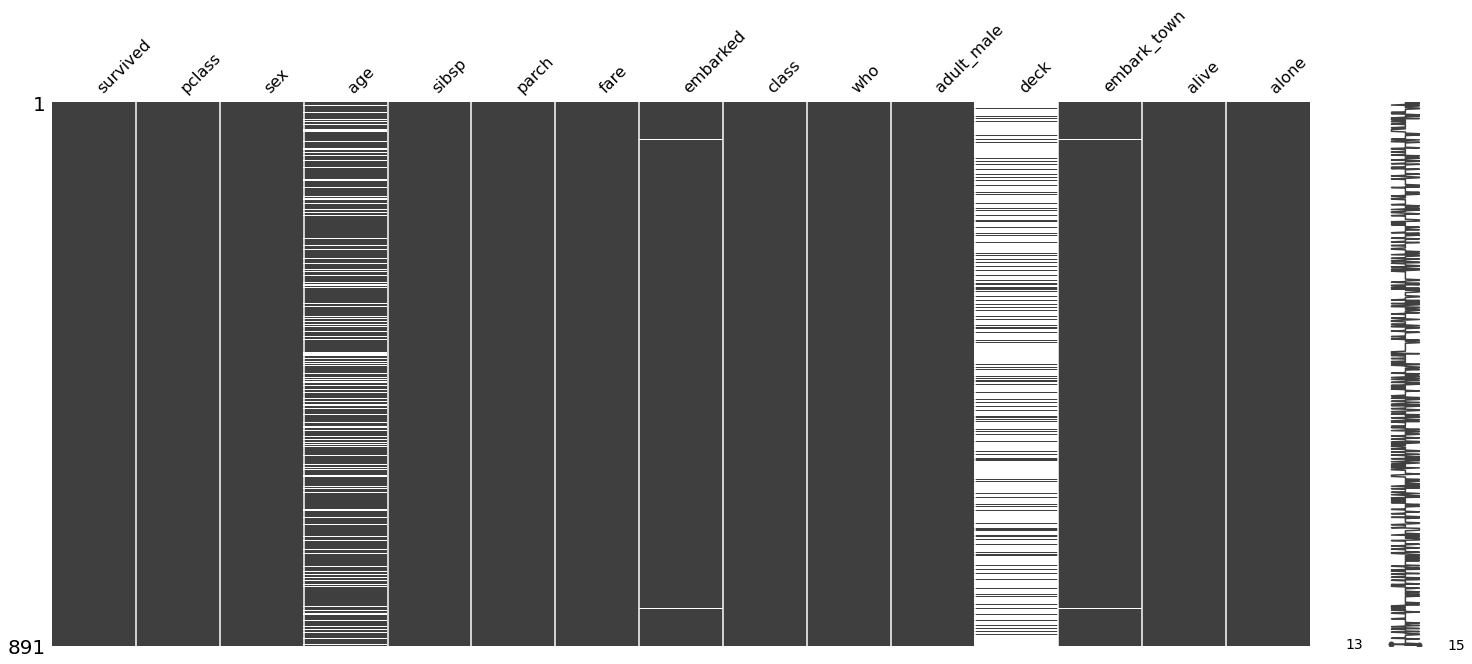

In [6]:
msno.matrix(df)

<AxesSubplot:>

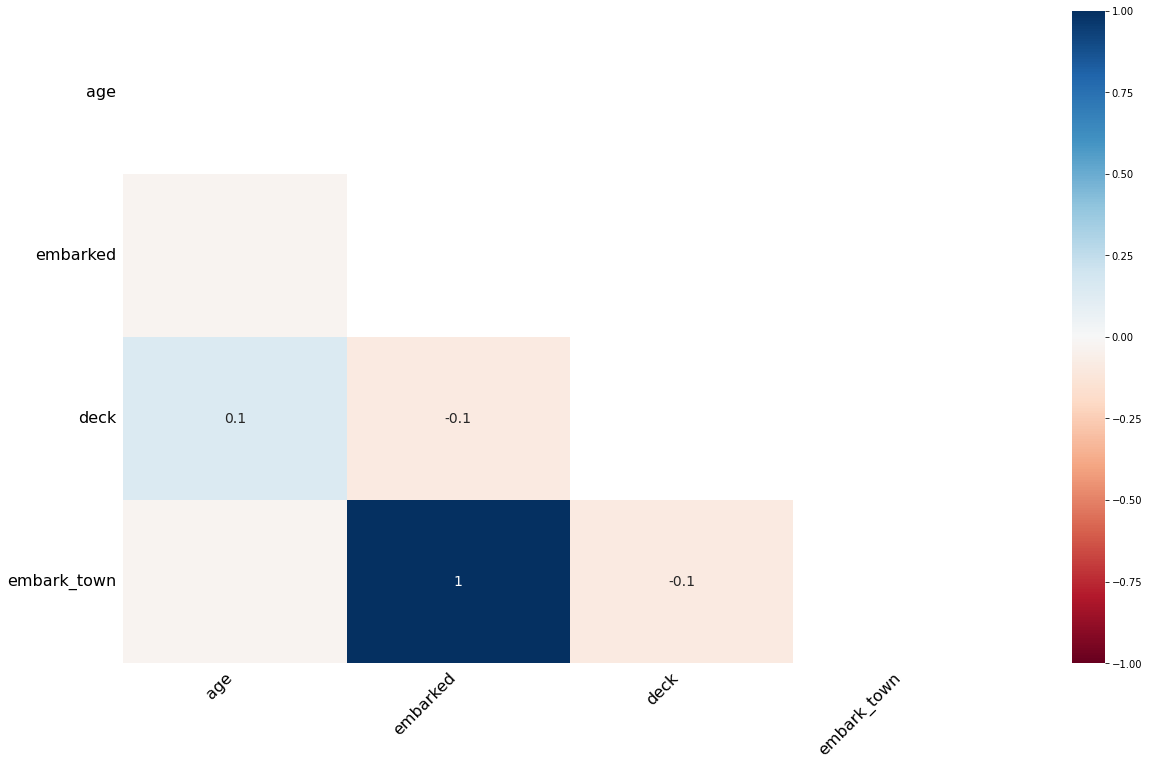

In [7]:
msno.heatmap(df)

## Reason for Missing Values:
Is it random or not?
1. **Missing Completely at Random (MCAR)**: The probability of the data being missing is not related to any other variables in the data set and the missing data does not introduce any bias into the analysis.


2. **Missing at Random (MAR)**: The probability of a data point being missing is related to one or more variables in the data set, but not the missing data itself but the missing data does not introduce significant bias into the analysis.


3. **Missing Not at Random (MNAR)**: The probability of a data point being missing is related to the missing data itself and the missing data introduces significant bias into the analysis.

# DELETION of Missing Values:

Deleting a missing info is not always recommended unless or until it is justifiable.

Three approaches:

![Deletion Approaches](delete.png)

1. **Pairwise Deletion:** Used when **MCAR**. In this method, only the observations with missing data are removed from the calculation for a specific variable. The rest of the observations are used in the calculation. This method is useful when the amount of missing data is relatively small and the impact of removing the missing data is expected to be minimal.

In [ ]:
df.dropna(subset=["embarked", "embark_town"], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

2. **Listwise deletion(row deletion)**: Used when **MCAR**. In this method, any observation with missing data is removed from the entire dataset. This method is useful when the amount of missing data is substantial and removing the missing data is expected to have a significant impact on the analysis.

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

3. **Column Deletion**: In this method, entire columns or variables with missing data are removed from the dataset. This method is useful when the amount of missing data is substantial and removing the entire variable is expected to have a minimal impact on the analysis.

In [ ]:
df.drop(columns=["deck"], inplace=True)

In [ ]:
df.columns